# Probability Problems
# Contents
## I. Counting
- Permutations
- Combinations

## II. Conditional Probability
- Conditional Probability
- Bayes formula

## III. Probability Distributions

- Probability distribution functions for discrete random variables (binomial, geometric, Poisson)
- Probability distribution for continuous random variables (uniform, normal, exponential)
- Generating simulations in python

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import itertools
from collections import Counter
from math import e, factorial

# I. Counting 

## QUESTION (Permutations) 
How many different strings can you make with 'name'? with 'data'? with 'better'?

#### ANSWER: 
You can make 24 different strings with 'name', 12 with 'data', and 180 with 'better'.

#### EXPLANATION: 
The factorial of the length of the word will yield all possible permutations of the letters. In order to count *distinct* permutations, we need to account for repeated letters in the input. To do this, we divide the number of all possible permutations by the number of permutations of repeated letters. 

We can do this straightforwardly in code by de-duplicating a list of all possible permutations.

In [2]:
def count_perms(seq):
    result = set()
    for perm in itertools.permutations(seq):
        result.add(perm)
    return len(result)

In [3]:
words = ["name", "data", "better", "mississippi"]

In [4]:
for word in words[:-1]:
    print(count_perms(word))
# count_perms('mississippi') # takes a long time to execute. 
# There are a lot of repeated letters in the sequence, 
# and itertools.permutations is actually building every single permutation before discarding it.

24
12
180


#### BONUS
Can we count the number of permutations without actually building the permutations and without using `itertools` library?

The Multinomial Theorem says in order to count the number of distinct ways a set of elements with duplicate items can be ordered, divide the total number of permutations by the factorial of the quantity of each duplicate.
So since "mississippi" has 11 total letters with 2 P’s, 4 I’s, and 4 S’s our calculation is: 11!/(2!4!4!).

In [5]:
def count_perms_2(seq):
    n = len(seq)
    num = factorial(n)
    reps = []
    denom = 1
    c = Counter(seq)
    for tup in c.most_common():
        char = tup[0]
        count = tup[1]
        if count > 1:
            denom *= factorial(count)
    
    return num // denom

In [6]:
for word in words:
    print(count_perms_2(word))

24
12
180
34650


#### BONUS:
Can we build unique permutations without using `itertools`?


[Here is a link](http://stackoverflow.com/a/12837695/429982) to the source of the code appearing below, with additional links to more resources.

In [7]:
def unique_permutations(seq):
    """
    Yield only unique permutations of seq in an efficient way.

    A python implementation of Knuth's "Algorithm L", also known from the 
    std::next_permutation function of C++, and as the permutation algorithm 
    of Narayana Pandita.
    """

    # Precalculate the indices we'll be iterating over for speed
    i_indices = range(len(seq) - 1, -1, -1)
    k_indices = i_indices[1:]

    # The algorithm specifies to start with a sorted version
    seq = sorted(seq)

    while True:
        yield seq

        # Working backwards from the last-but-one index,           k
        # we find the index of the first decrease in value.  0 0 1 0 1 1 1 0
        for k in k_indices:
            if seq[k] < seq[k + 1]:
                break
        else:
            # Introducing the slightly unknown python for-else syntax:
            # else is executed only if the break statement was never reached.
            # If this is the case, seq is weakly decreasing, and we're done.
            return

        # Get item from sequence only once, for speed
        k_val = seq[k]

        # Working backwards starting with the last item,           k     i
        # find the first one greater than the one at k       0 0 1 0 1 1 1 0
        for i in i_indices:
            if k_val < seq[i]:
                break

        # Swap them in the most efficient way
        (seq[k], seq[i]) = (seq[i], seq[k])                #       k     i
                                                           # 0 0 1 1 1 1 0 0

        # Reverse the part after but not                           k
        # including k, also efficiently.                     0 0 1 1 0 0 1 1
        seq[k + 1:] = seq[-1:k:-1]

In [8]:
factorial(len("mississippi"))

39916800

In [9]:
for word in words:
    print(len(list(unique_permutations(word)))) #almost instantaneous computation of 

24
12
180
34650


#### TIMING COMPARISION

In [10]:
%%timeit
len(list(unique_permutations('better')))

265 µs ± 47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit
count_perms("better")

169 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%%timeit
count_perms_2("better")

9.38 µs ± 825 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## QUESTION (Combinations)
Given a fruit bowl with 6 fruits (say for instance a pear, a banana, an apple, a pineapple, a kiwi and a mango), how many different fruit salad can you make, such that each salad contains 3 different fruits? Can you list them?

#### ANSWER: 
20
```
[('pear', 'banana', 'apple'),
 ('pear', 'banana', 'pineapple'),
 ('pear', 'banana', 'kiwi'),
 ('pear', 'banana', 'mango'),
 ('pear', 'apple', 'pineapple'),
 ('pear', 'apple', 'kiwi'),
 ('pear', 'apple', 'mango'),
 ('pear', 'pineapple', 'kiwi'),
 ('pear', 'pineapple', 'mango'),
 ('pear', 'kiwi', 'mango'),
 ('banana', 'apple', 'pineapple'),
 ('banana', 'apple', 'kiwi'),
 ('banana', 'apple', 'mango'),
 ('banana', 'pineapple', 'kiwi'),
 ('banana', 'pineapple', 'mango'),
 ('banana', 'kiwi', 'mango'),
 ('apple', 'pineapple', 'kiwi'),
 ('apple', 'pineapple', 'mango'),
 ('apple', 'kiwi', 'mango'),
 ('pineapple', 'kiwi', 'mango')]
 ```

#### EXPLANATION: 
To calculate the number of combinations of r
                    items that can be selected from a set of n items, divide
                    n-factorial by r-factorial multiplied by n-minus-r factorial
                    (binomial coefficient).
                    n-choose-r = n! / r! * (n - r)!


To find combinations of three fruits from a group of 6,
                    divide 6 factorial by 3 factorial multiplied by 3-factorial.

    6! / (3! * (6 - 3)!)
    = 720 / (6 * 6)
    = 20

   

In [13]:
 def make_fruit_salad(lst, k):
    '''
      return the list of possible combinations by taking k elements from lst

      use itertools.combinations

      >>> my_fruits = ['pear', 'banana', 'apple']
      >>> make_fruit_salad(my_fruits, 2)
      [('pear', 'banana'), ('pear', 'apple'), ('banana', 'apple')]
    '''
    combos = list(itertools.combinations(lst, k))
    return len(combos), combos

In [14]:
fruits = ["pear", "banana", "apple", "pineapple", "kiwi", "mango"]

In [15]:
make_fruit_salad(fruits, 3)

(20,
 [('pear', 'banana', 'apple'),
  ('pear', 'banana', 'pineapple'),
  ('pear', 'banana', 'kiwi'),
  ('pear', 'banana', 'mango'),
  ('pear', 'apple', 'pineapple'),
  ('pear', 'apple', 'kiwi'),
  ('pear', 'apple', 'mango'),
  ('pear', 'pineapple', 'kiwi'),
  ('pear', 'pineapple', 'mango'),
  ('pear', 'kiwi', 'mango'),
  ('banana', 'apple', 'pineapple'),
  ('banana', 'apple', 'kiwi'),
  ('banana', 'apple', 'mango'),
  ('banana', 'pineapple', 'kiwi'),
  ('banana', 'pineapple', 'mango'),
  ('banana', 'kiwi', 'mango'),
  ('apple', 'pineapple', 'kiwi'),
  ('apple', 'pineapple', 'mango'),
  ('apple', 'kiwi', 'mango'),
  ('pineapple', 'kiwi', 'mango')])

## QUESTION (Joint Probability)
You call 2 Ubers and 3 Lyfts. If the time that each takes to reach you are independent and identical distributions, what is the probability that all the Lyfts arrive first? What is the probability that all the Ubers arrive first?  


#### ANSWER: 
.01

 
#### EXPLANATION: 
3/5 * 2/4 * 1/3 = 1/10.

If the probability distributions are all independent and identical, then the chances that the first car to arrive is a Lyft is 3/5, the chances that the second car to arrive is a Lyft is 2/4, and the chances that the third car to arrive is a Lyft is 1/3. Multiply these together to find the joint probability.


# II. Conditional Probability and Bayes Theorem

## QUESTION (Conditional Probability)

A simplified model for the movement of the price of a stock supposes that on each day the stock’s price either moves up 1 unit with probability `p` or moves down 1 unit with probability `1 − p`. The changes on different days are assumed to be independent.

(a) What is the probability that after 2 days the stock will be at its original price?

(b) What is the probability that after 3 days the stock’s price will have increased by 1 unit?

(c) Given that after 3 days the stock’s price has increased by 1 unit, what is the probability that it went up on the first day?

#### ANSWER: 
    (a) p * (1 - p)
    (b) 2p * (1 - p)
    (c) 2/3
#### EXPLANATION:
    (a) union of two events
    (b) union of three events
    (c) the price went up twice and down once, and that could have happened on any of the three days

## QUESTION (Bayes)

A worker has asked her supervisor for a letter of recommendation for a new job. She estimates that there is an 80 percent chance that she will get the job if she receives a strong recommendation, a 40 percent chance if she receives a moderately good recommendation, and a 10 percent chance if she receives a weak recommendation. She further estimates that the probabilities that the recommendation will be strong, moderate, and weak are .7, .2, and .1, respectively.  

(a) How certain is she that she will receive the new job offer?  

(b) Given that she does receives the offer, how likely should she feel that she received a strong recommendation? a moderate recommendation? a weak recommendation?  

(c) Given that she does not receive the job offer, how likely should she feel that she received a strong recommendation? a moderate recommendation? a weak recommendation?

#### ANSWER: 
    (a) 0.65
    (b) .862, .123, .015
    (c) .4, .343, .257


#### EXPLANATION: 
    (a) .7 * .8 + .2 * .4 + .1 * .1
        = .56 + .08 + .01
        = .65
    (b) Using Bayes' Theorem...
        p(A|B) = p(B|A) * p(A) / p(B)
        p(strongrec | job)
        = p(job | strongrec) * p(strongrec) / p(job)
        = .8 * .7 / .65
        = .862

        = p(job | moderaterec) * p(moderaterec) / p(job)
        = .4 * .2 / .65
        = .123

        = p(job | weakrec) * p(weakrec) / p(job)
        = .1 * .1 / .65
        = .015

    (c) = p(nojob | strongrec) * p(strongrec) / p(nojob)
        = .2 * .6/ .35
        = .4

        = p(nojob | moderaterec) * p(moderaterec) / p(nojob)
        = .4 * .2/ .35
        = .343

        = p(nojob | weakrec) * p(weakrec) / p(nojob)
        = .9* .1/ .35
        = .257


## QUESTION (Bayes)

A medical study is looking at a test to detect disease that impacts 1 individual in 10. The data collected has shown that
- when a patient has the disease, the test is positive in 90% of the cases
- when a patient does not have the disease, the test is positive in 1% of the cases.

(a) If the test is positive, what is the probability that the patient as that disease?

(b) What if it is a rare disease, that impacts 1 in 10 000 individuals?

(c) How about if the test is negative?

#### ANSWER: 
    (a) .909
    (b) .009
    (c) .011

#### EXPLANATION: Using Bayes' Theorem (expanded version):
    p(A|B) = p(B|A) * p(A) / (p(B|A)* p(A) + p(B|!A) p(!A))

    (a) where A = having disease, B = testing positive, p(A) = .1
    .9 * .1 / (.9 * .1 + .01 * (1 - .1))
    = .09 / .009
    = .909

    (b) where p(A) = 1/10000
    .9 * .0001 / (.9 * .0001 + .01 * (1-.0001)
    = .00892

    (c) where B = testing negative
    (1 - .9) * .1 / ((1 - .9) * .1 + (1 - .01)* (1 -.1))
    .011


In [16]:
def positive_test(TP, FP, perc_population):
    '''
    parameters
    ----------
    TP: true positive
      percentage of tests that were positive
      for the sample of subjects that had the disease
    FP: false positive
      percentage of tests that were positive
      for the control population (disease-free subjects)

    percent_population: percentage of the population that has the disease

    returns
    -------
    probability of having the disease for a person with a positive test result
    '''
    return TP * perc_population / \
        (TP * perc_population + FP *(1-perc_population))

# III. Probability Distributions
Common problems relying on discrete (Binomial, Geometric, Poisson) or continuous (Uniform, Normal, Exponential) probability distributions.


## QUESTION (Probability mass function)
 A salesman has scheduled two appointments to sell encyclopedias. His first appointment will lead to a sale with probability 0.3, and his second will lead independently to a sale with probability 0.6. Any sale made is equally likely to be either for the deluxe model, which costs \\$ 1000, or the standard model, which costs \\$500. Determine the probability mass function of X, the total dollar value of all sales.

#### ANSWER:

| x    | p(x)  |
|------|-------|
| 0    | 0.280 |
| 500  | 0.270 |
| 1000 | 0.315 |
| 1500 | 0.090 |
| 2000 | 0.045 |

## QUESTION (Expected value)
A gambling book recommends the following “winning strategy” for the game of roulette: Bet \\$1 on red. If red appears (which has probability 18/38), then take the $1 profit and quit. If red does not appear and you lose this bet (which has probability 20/38 of occurring), make additional \\$1 bets of red on each of the next two spins of the roulette wheel and then quit. Let X denote your winnings when you quit.

(a) Find P(X > 0).

(b) Find E[X].

(c) Are you convinced that the strategy is indeed a “winning” strategy?

#### ANSWER

(a) p(X > 0) = 0.592

(b) E[X] = -0.108

(c) No, this is not a winning strategy over the long term. Although the probability of positive winnings is greater than 50% for a single game, the expected value of the winnings from all games is negative. (-0.108)

#### EXPLANATION
First, this problem is small enough that we can easily build a results table to help us conceptualize it. See code below.

In [17]:
def calc_prob_roll(x):
    if x == -1:
        return 20/38
    elif x == 1:
        return 18/38
    else:
        return 1

In [18]:
results_table = pd.DataFrame([[-1, combo[0], combo[1]] for combo in itertools.product([-1, 1], repeat=2)] + [[1, 0, 0]], 
                             columns=["roll_1", "roll_2", "roll_3"]
                            ).assign(p_roll_1=lambda x: x["roll_1"].apply(calc_prob_roll),
                                    p_roll_2=lambda x: x["roll_2"].apply(calc_prob_roll),
                                    p_roll_3=lambda x: x["roll_3"].apply(calc_prob_roll),
                                    winnings=lambda x: x["roll_1"] + x["roll_2"] + x["roll_3"],
                                    total_prob=lambda x: x["p_roll_1"] * x["p_roll_2"] * x["p_roll_3"],
                                    ev=lambda x: x["winnings"] * x["total_prob"]
                                    )

In [19]:
results_table

,roll_1,roll_2,roll_3,p_roll_1,p_roll_2,p_roll_3,winnings,total_prob,ev
0,-1,-1,-1,0.526316,0.526316,0.526316,-3,0.145794,-0.437382
1,-1,-1,1,0.526316,0.526316,0.473684,-1,0.131214,-0.131214
2,-1,1,-1,0.526316,0.473684,0.526316,-1,0.131214,-0.131214
3,-1,1,1,0.526316,0.473684,0.473684,1,0.118093,0.118093
4,1,0,0,0.473684,1.000000,1.000000,1,0.473684,0.473684


In [20]:
# part a
results_table.query("winnings > 0")["total_prob"].sum().round(3)

0.592

In [21]:
# part b
results_table.ev.sum().round(3)

-0.108

#### SIMULATION

In [22]:
from scipy.stats import binom

import random
choices = [-1] * 20 + [1] * 18

In [23]:
def make_next_rolls(x):
    if x == 0: # if black, bet again 
        return random.choice(choices)
    if x == 1: #if red, return NaN, to be filled later
        return 0

In [24]:
sim_results = (pd.DataFrame({"roll_1": binom.rvs(n=1, p=(18 / 38), size=100000)})
                       .assign(
                           roll_2=lambda x: x["roll_1"].apply(lambda x: make_next_rolls(x)),
                           roll_3=lambda x: x["roll_1"].apply(lambda x: make_next_rolls(x)),
                           roll_1=lambda x: x["roll_1"].replace(0, -1),
                            )
                       .assign(winnings=lambda x: x.sum(axis=1))
              )

In [25]:
sim_results.head()

,roll_1,roll_2,roll_3,winnings
0,-1,-1,1,-1
1,-1,1,-1,-1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [26]:
sim_results["winnings"].mean()

-0.11264

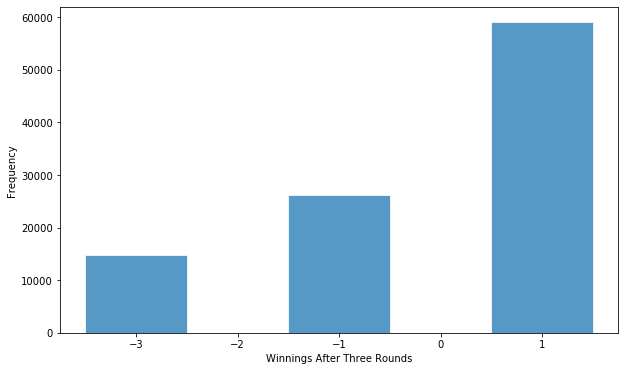

In [27]:
bins = np.arange(sim_results["winnings"].min(), sim_results["winnings"].max() + 1.5) - .5
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(sim_results["winnings"],
                  bins=bins,
                  kde=False,
                  hist_kws={'alpha':.75, "ec":"white"},
                 ax=ax
                 )
ax.set(xlabel='Winnings After Three Rounds', ylabel='Frequency')
plt.show()

In [28]:
sim_results_2 = (sim_results["winnings"].copy()
                     .value_counts()
                     .to_frame()
                     .reset_index()
                     .rename(columns={"index": "outcome", "winnings": "count"})
                     .assign(total_winnings=lambda x: x["outcome"] * x["count"])
                     .assign(positive_winnings=lambda x: x["total_winnings"] > 0)
                )

In [29]:
total_winnings_df = pd.concat([sim_results_2, pd.DataFrame([[-2, 0, 0 ,0], [0 ,0 ,0, 0]], columns=sim_results_2.columns)]).sort_values("outcome")

In [30]:
total_winnings_df

,outcome,count,total_winnings,positive_winnings
2,-3,14706,-44118,0
0,-2,0,0,0
1,-1,26220,-26220,0
1,0,0,0,0
0,1,59074,59074,1


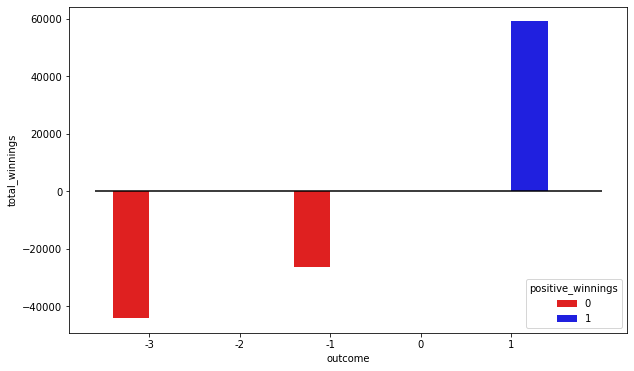

In [31]:
fig, ax = plt.subplots(figsize=(10, 6),)
sns.barplot(data=total_winnings_df, 
            x="outcome", 
            y="total_winnings", 
            ax=ax, 
            hue="positive_winnings", 
            palette={0: "red", 1: "blue"},
           )
ax.hlines(y=0, xmin=-0.6, xmax=5)

plt.show()

## QUESTION (Binomial Distribution)
The forecast says that in the next five days the chance of rain for each day is 25%. Suppose that the weather on each day does not depend on the weather on the other days. What is the probability that it will rain for at least two days in the next five days? For how many days on average will it rain in the next five days?  
#### ANSWER:
Where X = probability of rain in next five days:

    P(X >= 2) = 0.1035
    E[X] = 1.25

#### EXPLANATION:
    P(X >= 2) = 1 - P(X < 2)
              = 1 - (P(X = 0) + P(X = 1))
              = 1 - ((0.75^5)   + (5_choose_1 * 0.25^1 * (.75)^4)
              = 1 - (0.2373046875 + (5 * 0.25 * 0.31640625))

    E(X) = 5 * 0.25


In [32]:
def num_combos(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

In [33]:
def binom_pmf(n, x, p):
    n_choose_x = num_combos(n, x)
    pmf_bernoulli = p**x * (1 - p)**(n - x)
    return n_choose_x * pmf_bernoulli

In [34]:
# pmf_2 = binom_pmf(n=5, x=2, p=.25)
pmf_1 = binom_pmf(n=5, x=1, p=.25)
pmf_0 = binom_pmf(n=5, x=0, p=.25)
cdf = sum([pmf_0, pmf_1])
answer = 1 - cdf
answer

0.3671875

In [35]:
binom.sf(k=1, n=5, p=.25)

0.3671875

#### SIMULATION
- Experiment to implement: simulate the number of days of rain in the next five days, knowing the 25% forecast.
- Generate a large number of experiments to obtain the ratio of experiments in which that number is at least 2 over the total number of experiments.

In [36]:
from scipy.stats import binom

def probability_rain(simulation_size=1000):
    '''
    choose the simulation_size

    returns
    -------
    probability that it will rain for at least two days in the next five days,
    knowing that the forecast says that in the next five days the chance of rain
    for each day is 25%
    '''
    chance_rain = binom.rvs(n=5, p=0.25, size=simulation_size)
    return len(chance_rain[chance_rain > 1])/float(simulation_size)

In [37]:
binom.rvs(n=1, p=0.25, size=5)

array([0, 0, 0, 0, 1])

In [38]:
binom_result = []
for num in range(100000):
    binom_result.append(binom.rvs(n=1, p=0.25, size=5))

In [39]:
binom_df = pd.DataFrame(binom_result).assign(sum_days = lambda x: x.sum(axis=1))

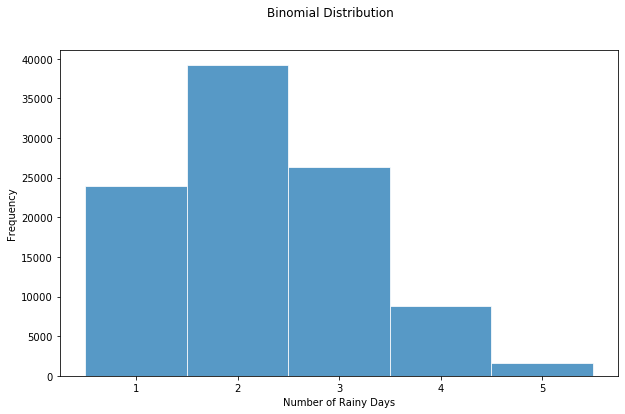

In [40]:
bins=np.arange(0, 5)

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(binom_df["sum_days"],
                  bins=np.arange(0, 6),
                  kde=False,
                  hist_kws={'alpha':.75, "ec":"white"},
                 ax=ax
                 )
ax.set(xticks=bins + .5, xticklabels = bins + 1, xlabel='Number of Rainy Days', ylabel='Frequency')

# ax = sns.kdeplot(binom_df["sum_days"], bw=.4)
fig.suptitle("Binomial Distribution")
plt.show()

In [41]:
binom_df.query("sum_days >= 2").shape[0] / binom_df.shape[0]

0.36805

In [42]:
(binom_df["sum_days"] >= 2).sum() / binom_df.shape[0]

0.36805

## QUESTION (Geometric distribution)
Suppose you have an unfair coin, with an 80 % chance of getting tails. What is the probability that the first head will be on the 10th trial?

#### ANSWER: 
0.02684

#### EXPLANATION
Using probability mass function for geometric distribution:

We need to calculate the probability of 9 failures, multiplied by the probability
of one success.

```
    (1-p)**(k-1)*p
    (1-0.2)**(10-1)*0.2
    = 0.0268
```

#### SIMULATION:
  - Experiment to implement: simulate the number of trials until the first success.
  - Generate a large number of experiments to obtain the ratio of experiments in which that number is at least 10 over the total number of experiments.

  If the probability of success on each trial is p, then the probability that the kth trial (out of k trials) is the first success is `geom.pmf(k) = (1-p)**(k-1)*p`


In [43]:
from scipy.stats import geom

def probability_coin(p=0.8, simulation_size=1000):
    '''
    choose the simulation_size
    p: probability of tails on a single flip of the coin

    use geom.rvs

    returns
    -------
    probability that the first head will be on the 10th trial, knowing
    that you have an unfair coin, with an p chance of getting tails.
    '''
    chance_heads = geom.rvs(1-p, size=simulation_size)
    return len(chance_heads[chance_heads == 10])/float(simulation_size)

In [44]:
probability_coin() # 1000 draws

0.024

In [45]:
probability_coin(simulation_size=100) # 100 draws

0.01

In [46]:
probability_coin(simulation_size=100000000) # 100 million draws

0.02684307

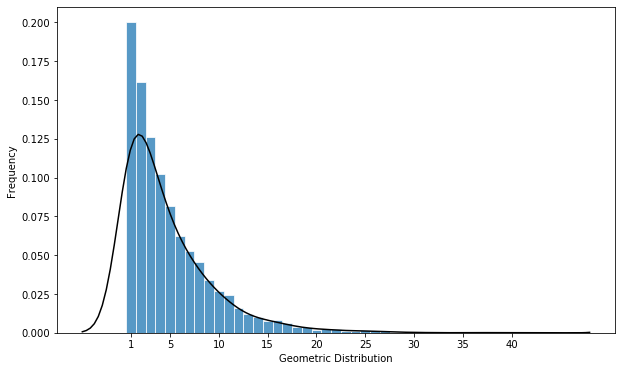

In [47]:
data_geom = geom.rvs(p=.2, size=10000) # 10 thousand draws
bins = np.arange(data_geom.max())
bin_labels = np.array([1] + list(range(5, data_geom.max(), 5)))
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(data_geom,
                  bins=bins,
                  kde=True,
                  hist_kws={'alpha':.75, "ec":"white"},
                  kde_kws={"color": "k", "bw":1.5}
                 )
ax.set(xlabel='Geometric Distribution', ylabel='Frequency')
ax.set_xticks(bin_labels + .5)
ax.set_xticklabels(bin_labels)
plt.show()

### ASIDE: Empirical Demo of CLT

In [48]:
repeated_simulations = np.array([probability_coin() for x in range(10000)]) # one thousand draws, record observed ratio, repeat 10 thousand times
repeated_simulations.mean()

0.026829400000000003

In [49]:
# theoretical answer
(1-0.2)**(10-1)*0.2

0.026843545600000015

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Simulation')]

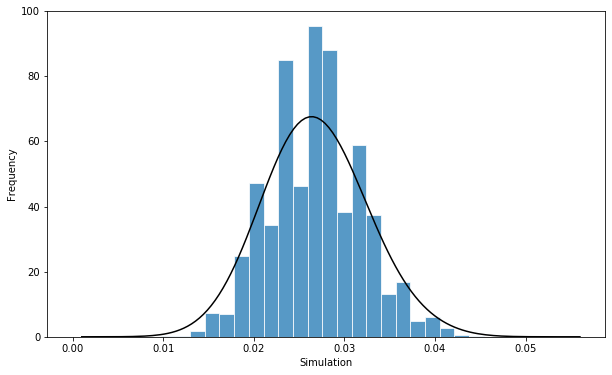

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(repeated_simulations,
                  bins=np.linspace(0, repeated_simulations.max(), 30),
                  kde=True,
                  hist_kws={'alpha':.75, "ec":"white"},
                  kde_kws={"color": "k", "bw":.003}
                 )
ax.set(xlabel='Simulation', ylabel='Frequency')

## QUESTION (Poisson distribution, with application of Bayes' Theorem)
The number of times that a person contracts a cold in a given year is a Poisson random variable with parameter λ = 5. Suppose that a new wonder drug (based on large quantities of vitamin C) has just been marketed that reduces the Poisson parameter to λ = 3 for 75 percent of the population. For the other 25 percent of the population, the drug has no appreciable effect on colds. If an individual tries the drug for a year and has 2 colds in that time, how likely is it that the drug is beneficial for him or her?


#### ANSWER
The probability that the drug is beneficial is 88.9 percent.


#### EXPLANATION
Use Bayes Theorem to find the probability that the drug works, given that an individual has experienced two colds in the past year, i.e.,
```
  P(drug_works|two_colds)

  P(A|B) = P(B|A) * P(A) / (P(B|A) * P(A) + P(B|notA) * P(notA)

  P(A) = 0.75

  P(notA) = 1 - prob_A = 0.25

  P(B|A) = poisson probability mass function of two colds when drug working
  P(x;λ)  = (e^−λ * λ^x) / x!

         Where λ is the shape parameter which indicates the average number of
         events in the given time interval.

  P(2;3) = ((~2.718) ^ -3 * 3^2 )/ 2!
         = 0.224


  P(B|notA) = poisson pmf of two colds when drug not working
  p(x;λ) = (e^−λ * λ^x) / x!
  P(2;5) = (~2.718) ^ -5 * 5^2 / 2!
         = 0.084
         
         
 P(A|B) = 0.224 * 0.75 / (0.224 * 0.75 + 0.084 * 0.25)
        = 0.889
```

#### SOLUTION ...Using `scipy`

In [51]:
from scipy.stats import poisson

def is_drug_effective(num_colds, l_drug, l_prior):
    '''
    num_colds: number of colds the person had over the 1 year period
    l_drug: parameter of a Poisson random variable that describes the number
    of times that a person contracts a cold in a given year taking the drug.
    l_prior: parameter of a Poisson random variable that describes the number
    of times that a person contracts a cold in a given year.

    use scipy.stats.poisson.pmf
    '''
    num = .75 * poisson.pmf(num_colds, l_drug)
    denom = num + (1 - .75) * poisson.pmf(num_colds, l_prior)
    return num / denom

In [52]:
is_drug_effective(num_colds=2, l_drug=3, l_prior=5)

0.8886436647538157

#### SOLUTION ...Without using `scipy`

In [53]:
p_a = .75
l_drug = 3
l_prior = 5

In [54]:
def pois_pmf(x, lamb):
    num = e ** -lamb * lamb ** x
    denom = factorial(x)
    return num / denom

In [55]:
b_given_a = pois_pmf(2, l_drug)
b_given_not_a = pois_pmf(2, l_prior)
print("B | A :\t\t", round(b_given_a, 3))
print("B | ~A :\t", round(b_given_not_a, 3))

B | A :		 0.224
B | ~A :	 0.084


In [56]:
def bayes(p_a, b_given_a, b_given_not_a):
    num = b_given_a * p_a
    p_not_a = 1 - p_a
    denom = num + (b_given_not_a * p_not_a)
    return num / denom

In [57]:
print("A | B :\t\t", round(bayes(p_a, b_given_a, b_given_not_a), 3))

A | B :		 0.889


#### SIMULATION

In [58]:
drug_works = binom.rvs(n=1, p=.75, size=10000)
pois_df = pd.DataFrame({"drug_works": drug_works})

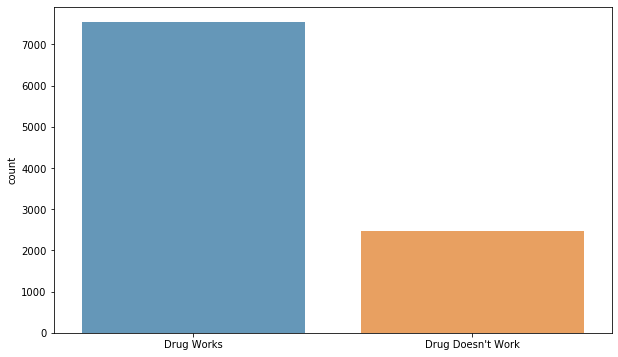

In [59]:
# Should be about 3:1 ratio
# pois_df.drug_works.value_counts().plot.bar()
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(pois_df.drug_works, 
              order=[1, 0],
             ax=ax,
            alpha=.75
             )
ax.set(xticklabels=["Drug Works", "Drug Doesn't Work"], xlabel='')
plt.show()

In [60]:
from scipy.stats import poisson

In [61]:
#If drug works, average num colds is 3, if drug doesnt work, average num colds is 5
def num_colds(x):
    if x == 1:
        return poisson.rvs(3)
    elif x == 0:
        return poisson.rvs(5)

pois_df["num_colds"] = pois_df.drug_works.apply(num_colds)

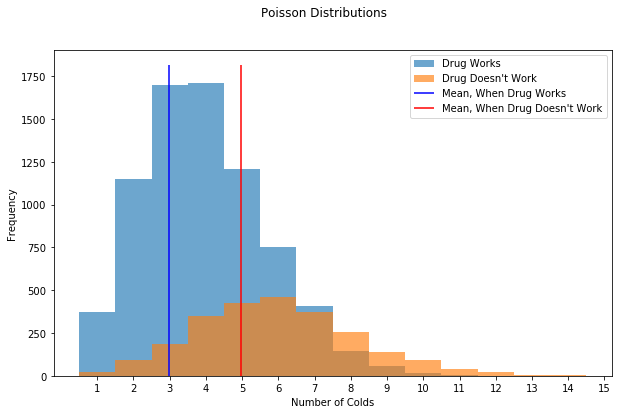

In [62]:
max_num = pois_df.num_colds.max() + 1
bins = np.arange(max_num)

drug_works_df = pois_df.query("drug_works == 1")
drug_no_works_df = pois_df.query("drug_works != 1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(drug_works_df["num_colds"], alpha=0.65, bins=bins, label="Drug Works")
ax.hist(drug_no_works_df["num_colds"], alpha=0.65, bins=bins, label="Drug Doesn't Work")
ymax = ax.get_ylim()[1] * 1.01
ax.vlines(x=drug_works_df["num_colds"].mean() - .5, 
          ymin=0, ymax=ymax, 
          color="blue", 
          label="Mean, When Drug Works")
ax.vlines(x=drug_no_works_df["num_colds"].mean() - .5, 
          ymin=0, ymax=ymax, 
          color="red", 
          label="Mean, When Drug Doesn't Work")
ax.set_xticks(bins + .5)
ax.set_xticklabels(bins + 1)
ax.set_xlabel("Number of Colds")
ax.set_ylabel("Frequency")
ax.legend()

fig.suptitle("Poisson Distributions")
# fig.savefig("poisson.png")
plt.show()


In [63]:
#   P(drug_works|two_colds)
#   P(A|B) = P(B|A) * P(A) / (P(B|A) * P(A) + P(B|notA) * P(notA)

count_a_and_b = pois_df.query("drug_works == 1 & num_colds == 2").shape[0]
count_a = pois_df.query("drug_works == 1").shape[0]
ratio_b_given_a = count_a_and_b / count_a

count_not_a = pois_df.query("drug_works != 1").shape[0]
count_not_a_and_b = pois_df.query("drug_works != 1 & num_colds == 2").shape[0]
ratio_b_given_not_a = count_not_a_and_b / count_not_a

# perform final calculation
sim_solution = (ratio_b_given_a  * count_a) /(ratio_b_given_a  * count_a + ratio_b_given_not_a * count_not_a)

In [64]:
print("A | B:\t\t", round(sim_solution, 3))

A | B:		 0.903


### QUESTION (Exponential distribution)

The number of years a radio functions is exponentially distributed with parameter λ = 1 / 8 . If Jones buys a used radio, what is the probability that it will be working after an additional 8 years?

#### ANSWER
0.368

#### EXPLANATION
  Use probability density function for an exponential distribution to calculate radio lasting 8 years or less:
```
  f(x; λ)     = 1 − e^(−λx)
  f(8; 0.125) = 1 - (~2.718)^(-0.125*8)
              = 0.63212...
```
need to take inverse to get probability that radio lasts longer than 8 years:
```
  1 - 0.63212 = 0.368
```

#### SOLUTION ...Using `scipy`

In [65]:
from scipy.stats import expon
round(expon.sf(8, scale=8), 3)

0.368

#### SIMULATION:
- Generate a large number of experiments to obtain the ratio of experiments in which the used radio will be working after an additional 8 years over the total number of experiments.

In [66]:
def working_radio(num_years, simulation_size):
    '''
    choose the simulation_size

    use scipy.stats.expon.rvs
    returns
    -------
    probability that the radio will work after 'num_years' years, knowing that
    the number of years a radio functions is exponentially distributed with
    parameter λ = 1 / 8
    '''
    lam = 1/8.
    lifespan = expon.rvs(size=simulation_size, scale = 1/float(lam))
    return len(lifespan[lifespan>num_years])/float(simulation_size)

In [67]:
working_radio(8, 10000)

0.378

### QUESTION (Uniform distribution)

Let X be the average number of donuts a data scientist eats per week. X is uniformly distributed from 1/2 to 10 donuts, inclusive.

What is the probability that a randomly selected data scientist eats an average of more than 5 donuts.

#### ANSWER
0.526

#### EXPLANATION
Use cumulative density function for continuous distribution = (x-a)/(b-a)
So, in this case the probability that a data scientist eats 5 donuts or fewer: (5-.5)/(10-.5) = .474

But, we need the complement of this... so 1 - CDF = .526

In [68]:
from scipy.stats import uniform

def eating_donut_probability(number_donut, bottom_num, top_num):
    '''
    use uniform.sf (1-cdf)

    return
    ------
    probability that a randomly selected data scientist eats an average of more than 'number_donut' donuts. 
    X, the average number of donut, is uniformly distributed from 'bottom_num' to 'top_num' donuts, inclusive.
    '''
    return uniform.sf(number_donut, loc=bottom_num, scale=top_num-bottom_num)

In [69]:
eating_donut_probability(5, .5, 10)

0.5263157894736843

## QUESTION (Normal distribution)
Suppose that X is a normal random variable with mean 5. If P(X > 9) = .2, approximately what is Var(X )?

#### ANSWER:
22.675

#### EXPLANATION:
```
  If P(X > 9) = .2
  then P(X < 9) = .8
  reverse look up .8 on normal table (i.e., find z score by using a cumulative probability)
  z score of a cumulative probability of .8 = .84
  stddev = (x - mu) / z score
         = (9 - 5)/.84
         = 4.7619
  variance = stddev ^2
           = (4.7619)^2
           = 22.675
```

In [70]:
from scipy.stats import norm

def get_variance(mean, cutoff, proba_over_cutoff):
    '''
    use scipy.stats.norm.ppf, in inverse of cdf
    returns
    -------
    the variance Var(X) knowing that X is a normal random variable with a
    distribution
      - centered at 'mean',
      - such that P(x > 'cutoff') = 'proba_over_cutoff'
    '''
    return ((cutoff - mean) / norm.ppf(proba_over_cutoff)) ** 2

In [71]:
get_variance(5, 9, .2)

22.58845955869675